In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_svhn_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_svhn_data()

In [3]:
import network, train, utils
from layers import ReluLayer, BinaryFullyConnectedLayer, \
    BinaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer, DropOutLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(BinaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(BinaryConvolutionLayer(
    out_dim=64, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
opt.set_rho(0.5)
opt.set_ema_rates(0.999)

In [7]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

n_epochs = 200

for t in range(n_epochs):    
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)

    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 1.773907, 0.16
Iter: 68 of 682 || Estimated train loss/acc: 1.597021, 0.11
Iter: 136 of 682 || Estimated train loss/acc: 1.426683, 0.14
Iter: 204 of 682 || Estimated train loss/acc: 1.175268, 0.38
Iter: 272 of 682 || Estimated train loss/acc: 1.025975, 0.37
Iter: 340 of 682 || Estimated train loss/acc: 0.894128, 0.48
Iter: 408 of 682 || Estimated train loss/acc: 0.753599, 0.64
Iter: 476 of 682 || Estimated train loss/acc: 0.690076, 0.57
Iter: 544 of 682 || Estimated train loss/acc: 0.585147, 0.79
Iter: 612 of 682 || Estimated train loss/acc: 0.528185, 0.78
Iter: 680 of 682 || Estimated train loss/acc: 0.458534, 0.81
Train loss/acc:  (0.5396749435399627, 0.6268368089104931) Test loss/acc:  (0.5448413360463232, 0.5987246516077667)
Epoch:  1
========= Begin epoch 

Iter: 68 of 682 || Estimated train loss/acc: 0.049385, 0.92
Iter: 136 of 682 || Estimated train loss/acc: 0.044489, 0.95
Iter: 204 of 682 || Estimated train loss/acc: 0.026715, 0.95
Iter: 272 of 682 || Estimated train loss/acc: 0.044277, 0.93
Iter: 340 of 682 || Estimated train loss/acc: 0.022114, 0.98
Iter: 408 of 682 || Estimated train loss/acc: 0.034775, 0.95
Iter: 476 of 682 || Estimated train loss/acc: 0.020640, 0.98
Iter: 544 of 682 || Estimated train loss/acc: 0.024136, 0.96
Iter: 612 of 682 || Estimated train loss/acc: 0.050209, 0.93
Iter: 680 of 682 || Estimated train loss/acc: 0.031328, 0.97
Train loss/acc:  (0.03935989237630722, 0.9438738823155322) Test loss/acc:  (0.051453022662946324, 0.925169029958276)
Epoch:  9
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974, 0.99936974]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 682 || Estimated train loss/acc: 

In [8]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (0.044248123504659696, 0.935816106909157)
Valid:  (0.05879733398556709, 0.9170000100135803)
Test:  (0.05626489618391293, 0.9197526163459924)


In [9]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  9
Train acc:  0.9438738823155322
Valid acc:  0.929599997997284
Test acc:  0.925169029958276


Final results:  [0.04424812 0.93581611 0.05879733 0.91700001 0.0562649  0.91975262]


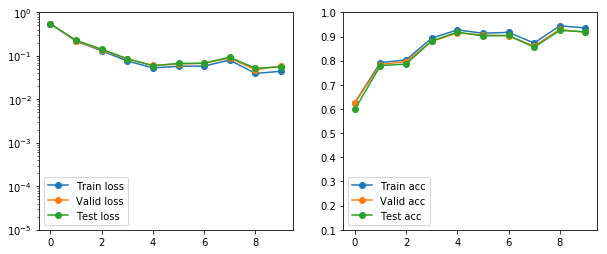

In [10]:
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax1.set_ylim(1e-5,1)
ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])